In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import plot, show
from sklearn.neighbors import NearestNeighbors
from datetime import datetime
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from matplotlib import cm
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
%matplotlib inline

# 1. a.  To load and read the bank_marketing_data Dataset into a data frame

In [2]:
bank_marketing_data = pd.read_csv('bank_marketing_data.csv')

1. b.  
# Initial examination of the data

In [3]:
bank_marketing_data.drop('Unnamed: 0', axis=1, inplace=True)

Let us see the size of the dataset in terms of rows and columns


In [4]:
bank_marketing_data.shape

(9280, 20)

We can see that there are 9280 rows and 20 columns

Let us examine the Columns information


In [5]:
bank_marketing_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

Let usxamine the first five rows of the dataset

In [6]:
bank_marketing_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,35.0,admin.,single,university.degree,no,yes,no,cellular,may,thu,1.0,999.0,1.0,failure,-1.8,92.893,-46.2,1.266,5099.1,no
1,42.0,technician,married,professional.course,no,no,no,telephone,may,tue,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
2,36.0,admin.,married,university.degree,no,no,no,cellular,aug,mon,2.0,999.0,0.0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,yes
3,37.0,admin.,married,high.school,no,yes,yes,telephone,jul,wed,2.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,yes
4,31.0,management,single,university.degree,no,yes,no,cellular,apr,thu,1.0,999.0,0.0,nonexistent,-1.8,93.075,-47.1,1.365,5099.1,no


 Let us examine the last five rows of the dataset

In [7]:
bank_marketing_data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
9275,45.0,blue-collar,married,unknown,no,yes,no,cellular,apr,thu,1.0,999.0,1.0,failure,-1.8,93.075,-47.1,1.410,5099.1,yes
9276,60.0,admin.,married,university.degree,no,yes,no,cellular,may,mon,2.0,999.0,0.0,nonexistent,-1.8,92.893,-46.2,1.354,5099.1,yes
9277,38.0,blue-collar,married,basic.9y,no,yes,no,cellular,apr,fri,1.0,999.0,1.0,failure,-1.8,93.075,-47.1,1.405,5099.1,no
9278,41.0,technician,single,university.degree,no,no,no,cellular,jul,thu,2.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
9279,56.0,services,married,high.school,unknown,yes,no,telephone,jul,thu,11.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no


To check/determine the size of the dataset in terms of number of rows and columns

In [8]:

bank_marketing_data.shape

(9280, 20)

To check the feature types of the dataset

In [9]:
bank_marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9280 entries, 0 to 9279
Data columns (total 20 columns):
age               9261 non-null float64
job               9280 non-null object
marital           9280 non-null object
education         9253 non-null object
default           9248 non-null object
housing           9259 non-null object
loan              9258 non-null object
contact           9280 non-null object
month             9280 non-null object
day_of_week       9280 non-null object
campaign          9250 non-null float64
pdays             9260 non-null float64
previous          9252 non-null float64
poutcome          9264 non-null object
emp.var.rate      9250 non-null float64
cons.price.idx    9260 non-null float64
cons.conf.idx     9256 non-null float64
euribor3m         9255 non-null float64
nr.employed       9261 non-null float64
y                 9280 non-null object
dtypes: float64(9), object(11)
memory usage: 1.4+ MB


To view a Descriptive Statistics Summary for all numeric features of the dataset

In [10]:
bank_marketing_data.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,9261.000000,9250.000000,9260.000000,9252.000000,9250.000000,9260.000000,9256.000000,9255.000000,9261.000000
mean,40.464421,2.321514,888.323002,0.317013,-0.493038,93.482013,-40.184389,2.968689,5135.528215
std,11.969497,2.296910,312.529933,0.700171,1.723534,0.634667,5.359439,1.890814,87.031409
min,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,92.893000,-42.700000,1.244000,5076.200000
50%,38.000000,2.000000,999.000000,0.000000,-0.100000,93.444000,-41.800000,4.021000,5191.000000
75%,48.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.959000,5228.100000
max,98.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


To view a boxplot of the dataset

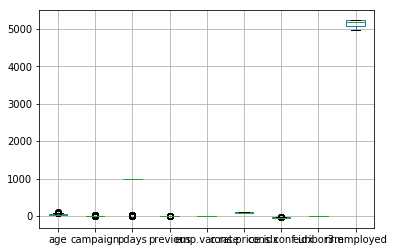

In [11]:
bank_marketing_data.boxplot()

To do more advanced boxplots through pandas

C:\Users\compag\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


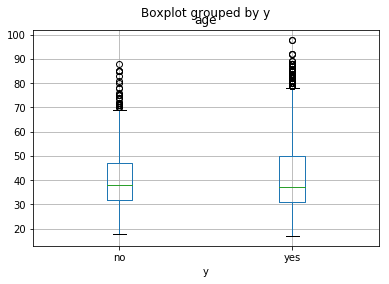

In [12]:
bank_marketing_data.boxplot(column='age', by='y')

To know how many customers signed up for term deposits and how many that didn't

In [13]:
bank_marketing_data['y'].value_counts()

no     4640
yes    4640
Name: y, dtype: int64

To enable us plot the above data as a barchart

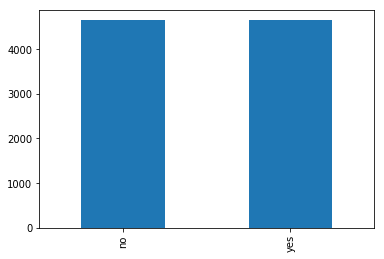

In [14]:
#bank_marketing_data['y'].value_counts().plot(kind = 'bar')
value_counts_for_y = bank_marketing_data['y'].value_counts()
value_counts_for_y.plot(kind = 'bar')

In [15]:
bank_marketing_data.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,9261.000000,9280,9280,9253,9248,9259,9258,9280,9280,9280,9250.000000,9260.000000,9252.000000,9264,9250.000000,9260.000000,9256.000000,9255.000000,9261.000000,9280
unique,NaN,12,4,8,2,3,3,2,10,5,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,2561,5393,3031,7751,4922,7669,6625,2512,1999,NaN,NaN,NaN,7209,NaN,NaN,NaN,NaN,NaN,4640
mean,40.464421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.321514,888.323002,0.317013,NaN,-0.493038,93.482013,-40.184389,2.968689,5135.528215,NaN
std,11.969497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.296910,312.529933,0.700171,NaN,1.723534,0.634667,5.359439,1.890814,87.031409,NaN
min,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,999.000000,0.000000,NaN,-1.800000,92.893000,-42.700000,1.244000,5076.200000,NaN
50%,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,999.000000,0.000000,NaN,-0.100000,93.444000,-41.800000,4.021000,5191.000000,NaN
75%,48.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.959000,5228.100000,NaN


In [16]:
bank_marketing_data.describe(include=['O'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,9280,9280,9253,9248,9259,9258,9280,9280,9280,9264,9280
unique,12,4,8,2,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,2561,5393,3031,7751,4922,7669,6625,2512,1999,7209,4640


In [17]:
bank_marketing_data.describe(include=[np.number, np.object])

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,9261.000000,9280,9280,9253,9248,9259,9258,9280,9280,9280,9250.000000,9260.000000,9252.000000,9264,9250.000000,9260.000000,9256.000000,9255.000000,9261.000000,9280
unique,NaN,12,4,8,2,3,3,2,10,5,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,2561,5393,3031,7751,4922,7669,6625,2512,1999,NaN,NaN,NaN,7209,NaN,NaN,NaN,NaN,NaN,4640
mean,40.464421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.321514,888.323002,0.317013,NaN,-0.493038,93.482013,-40.184389,2.968689,5135.528215,NaN
std,11.969497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.296910,312.529933,0.700171,NaN,1.723534,0.634667,5.359439,1.890814,87.031409,NaN
min,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,999.000000,0.000000,NaN,-1.800000,92.893000,-42.700000,1.244000,5076.200000,NaN
50%,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,999.000000,0.000000,NaN,-0.100000,93.444000,-41.800000,4.021000,5191.000000,NaN
75%,48.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.959000,5228.100000,NaN


To know the number of contacts performed before this campaign and for this client 


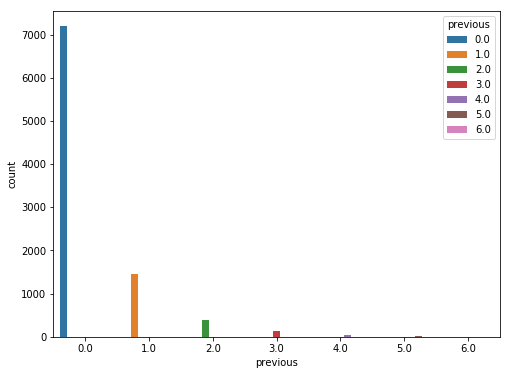

In [18]:
plt.rcParams['figure.figsize'] = (8, 6)
sns.countplot(x='previous',hue='previous',data=bank_marketing_data);

To plot employment variation rate - quarterly indicator emp.var.rate

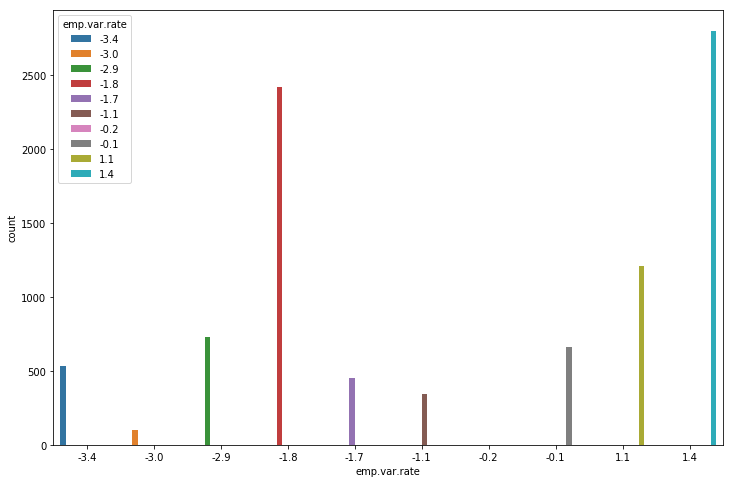

In [19]:
plt.rcParams['figure.figsize'] = (12, 8)
sns.countplot(x='emp.var.rate', hue='emp.var.rate', data=bank_marketing_data);

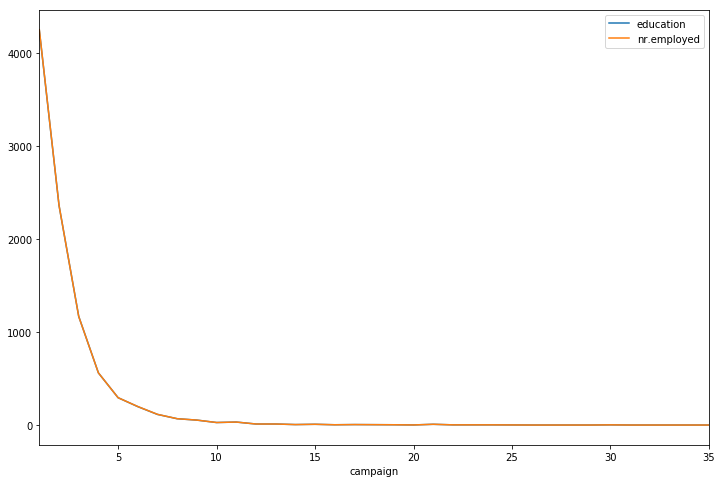

In [20]:
# plot data
fig, ax = plt.subplots(figsize=(12,8))
bank_marketing_data.groupby(['campaign']).count()[['education','nr.employed']].plot(ax=ax)

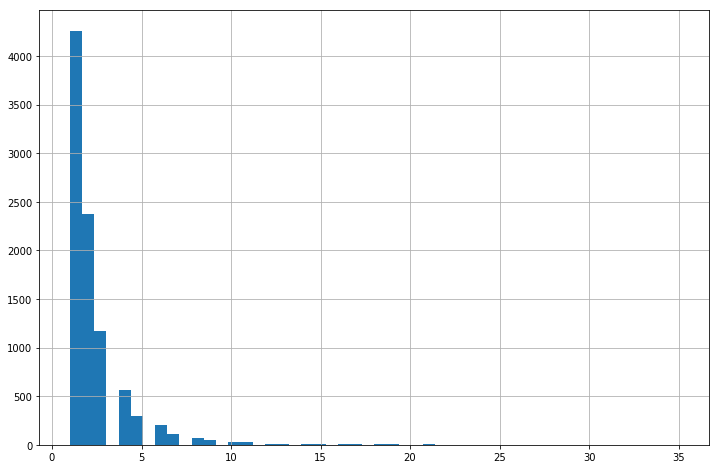

In [21]:
# Please find below, another method to plot a histogram of the campaign 
bank_marketing_data['campaign'].hist(bins=50)

# 1.c To check for and treat missing values

To plot the distribution of missing values over the dataset’s features

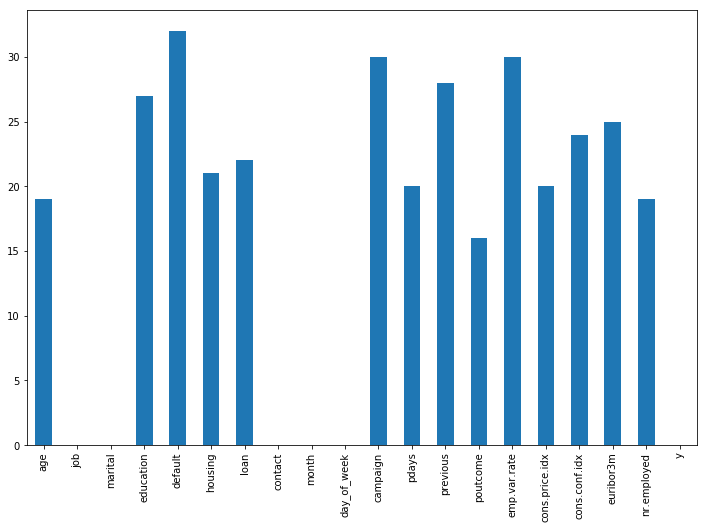

In [22]:
value_counts_for_y = bank_marketing_data.isnull().sum()
value_counts_for_y.plot(kind = 'bar')

To check for the null values

In [23]:
bank_marketing_data.isnull()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [24]:
# Which rows are null?
rows_with_null = bank_marketing_data.isnull().any(axis=1)
rows_with_null

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21       True
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
9250    False
9251    False
9252    False
9253    False
9254    False
9255    False
9256    False
9257    False
9258    False
9259    False
9260    False
9261    False
9262    False
9263    False
9264    False
9265     True
9266    False
9267    False
9268    False
9269    False
9270    False
9271    False
9272    False
9273    False
9274    False
9275    False
9276    False
9277    False
9278    False
9279    False
Length: 9280, dtype: bool

To check how many null or missing  values that we have per column

In [25]:
bank_marketing_data.isnull().sum()

age               19
job                0
marital            0
education         27
default           32
housing           21
loan              22
contact            0
month              0
day_of_week        0
campaign          30
pdays             20
previous          28
poutcome          16
emp.var.rate      30
cons.price.idx    20
cons.conf.idx     24
euribor3m         25
nr.employed       19
y                  0
dtype: int64

To sum up the total number of null or missing values across the data set

In [26]:
bank_marketing_data.isnull().sum().sum()

333

To check the null values that we have across rows

In [27]:
def get_rows_with_missing_values(bank_marketing_data):
    return bank_marketing_data[bank_marketing_data.isnull().any(axis=1)]

In [28]:
get_rows_with_missing_values(bank_marketing_data)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
21,61.0,unknown,single,NaN,no,yes,yes,cellular,may,tue,3.0,999.0,0.0,nonexistent,-1.8,92.893,-46.2,1.266,5099.1,no
33,31.0,blue-collar,single,professional.course,no,no,no,telephone,may,thu,3.0,999.0,0.0,nonexistent,1.1,93.994,NaN,4.855,5191.0,no
44,49.0,management,married,university.degree,no,no,no,cellular,apr,wed,1.0,999.0,0.0,nonexistent,-1.8,NaN,-47.1,1.415,5099.1,yes
64,20.0,student,single,high.school,no,no,no,cellular,aug,fri,NaN,999.0,1.0,failure,-2.9,92.201,-31.4,0.869,5076.2,no
108,38.0,admin.,married,NaN,no,yes,no,cellular,aug,fri,7.0,999.0,0.0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
122,37.0,self-employed,married,NaN,no,no,yes,telephone,may,fri,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
134,31.0,admin.,married,university.degree,no,no,no,cellular,jun,thu,2.0,999.0,1.0,failure,-2.9,NaN,-40.8,1.260,5076.2,yes
188,35.0,blue-collar,married,high.school,unknown,yes,no,cellular,nov,mon,2.0,999.0,1.0,failure,NaN,93.200,-42.0,4.191,5195.8,no
203,40.0,admin.,single,high.school,unknown,yes,no,cellular,nov,mon,1.0,999.0,0.0,nonexistent,-0.1,93.200,-42.0,4.191,NaN,no
207,33.0,student,married,high.school,no,no,yes,cellular,jul,wed,3.0,999.0,0.0,nonexistent,1.4,93.918,NaN,4.963,5228.1,no


 Fill-in campaign missing values using median

In [29]:
 bank_marketing_data['campaign'].fillna(bank_marketing_data['campaign'].median(), inplace=True)


Fill-in pdays missing values using mode

In [30]:
pdays_mode = bank_marketing_data['pdays'].mode()
pdays_mode[0]

999.0

Fill-in pdays missing values using mode

In [31]:
previous_mode = bank_marketing_data['previous'].mode()
previous_mode[0]

0.0

Fill-in emp.var.rate missing values using median

In [32]:
bank_marketing_data['emp.var.rate'].fillna(bank_marketing_data['emp.var.rate'].median(), inplace=True)

In [33]:
# Fill-in cons.price.idx missing values using interpolation

In [34]:
#bank_marketing_data['cons.price.idx'].interpolate(method='linear', inplace=True)

In [35]:
# Fill-in cons.conf.idx missing values using interpolation

In [36]:
#bank_marketing_data['cons.conf.idx'].interpolate(method='linear', inplace=True)

In [37]:
# Fill-in euribor3m missing values using interpolation

In [38]:
#bank_marketing_data['euribor3m'].interpolate(method='linear', inplace=True)

In [39]:
#Fill-in nr.employed missing values using interpolation

In [40]:
#bank_marketing_data['nr.employed'].interpolate(method='linear', inplace=True)

To treat the remaining columns for missing values, we shall drop the remaining rows with missing values 

In [41]:
bank_marketing_data.dropna(inplace=True)

Let us look at the new shape of our dataset

In [42]:
bank_marketing_data.shape

(9012, 20)

In [43]:
bank_marketing_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,35.0,admin.,single,university.degree,no,yes,no,cellular,may,thu,1.0,999.0,1.0,failure,-1.8,92.893,-46.2,1.266,5099.1,no
1,42.0,technician,married,professional.course,no,no,no,telephone,may,tue,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
2,36.0,admin.,married,university.degree,no,no,no,cellular,aug,mon,2.0,999.0,0.0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,yes
3,37.0,admin.,married,high.school,no,yes,yes,telephone,jul,wed,2.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,yes
4,31.0,management,single,university.degree,no,yes,no,cellular,apr,thu,1.0,999.0,0.0,nonexistent,-1.8,93.075,-47.1,1.365,5099.1,no


In [44]:
bank_marketing_data.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,9012.000000,9012.000000,9012.000000,9012.000000,9012.000000,9012.000000,9012.000000,9012.000000,9012.000000
mean,40.452286,2.317022,888.030737,0.315024,-0.487750,93.481367,-40.184698,2.973301,5135.834432
std,11.977110,2.282833,312.893274,0.700100,1.721357,0.633840,5.359914,1.890437,86.939849
min,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,92.893000,-42.700000,1.244000,5076.200000
50%,38.000000,2.000000,999.000000,0.000000,-0.100000,93.444000,-41.800000,4.021000,5191.000000
75%,48.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.959000,5228.100000
max,98.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Let us check if there are any missing values remaining in the dataset

In [45]:
get_rows_with_missing_values(bank_marketing_data)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


From the above empty rows and columns, we can see that we have eliminated all the missing values.


There are no more missing values

# 1.d. To check if there are any duplicate rows

In [46]:
duplicate_rows = bank_marketing_data.duplicated()
print(duplicate_rows[:10])

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
dtype: bool


To check the number of duplicate rows

In [47]:
print('Number of duplicate rows is', duplicate_rows.sum())

Number of duplicate rows is 347


To see the duplicate rows in our dataset

In [48]:
print('Duplicate rows of bank_marketing_data:\n \n')
bank_marketing_data[bank_marketing_data.duplicated()]

Duplicate rows of bank_marketing_data:
 



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
373,43.0,blue-collar,single,basic.9y,no,yes,no,telephone,jun,wed,21.0,999.0,0.0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
414,52.0,admin.,divorced,university.degree,no,yes,no,cellular,nov,fri,1.0,999.0,0.0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,no
494,34.0,technician,single,professional.course,no,no,no,cellular,aug,wed,1.0,999.0,0.0,nonexistent,-2.9,92.201,-31.4,0.884,5076.2,yes
612,32.0,admin.,single,university.degree,no,no,no,telephone,may,tue,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
791,40.0,blue-collar,divorced,basic.9y,no,no,no,cellular,jul,thu,4.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
841,31.0,technician,married,professional.course,no,no,no,cellular,aug,mon,1.0,999.0,0.0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
896,23.0,services,single,basic.9y,no,yes,no,cellular,may,thu,1.0,999.0,1.0,failure,-1.8,92.893,-46.2,1.266,5099.1,no
900,27.0,admin.,married,university.degree,no,no,no,telephone,jul,wed,6.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
944,32.0,technician,single,university.degree,no,yes,no,cellular,jul,thu,1.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
945,52.0,blue-collar,married,basic.9y,no,yes,no,cellular,jul,mon,2.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no


To Remove duplicate rows


In [49]:
bank_marketing_data = bank_marketing_data.drop_duplicates()

To check if duplicates have been removed

In [50]:
print('Number of duplicate rows in bank_marketing_data is',\
      bank_marketing_data.duplicated().sum()) 


Number of duplicate rows in bank_marketing_data is 0


# 1. e  To begin Exploring  for  potential  outliers  on  numerical  features. 

To begin, we shall extract and operate on numeric values only

In [51]:
bank_marketing_data_numerics_only = bank_marketing_data.select_dtypes(include=[np.number])

Then we scale the data to enable us work with it

In [52]:
bank_marketing_data_stan = (bank_marketing_data_numerics_only - bank_marketing_data.mean()) / bank_marketing_data.std()

Next we plot our box plot to observe the outliers

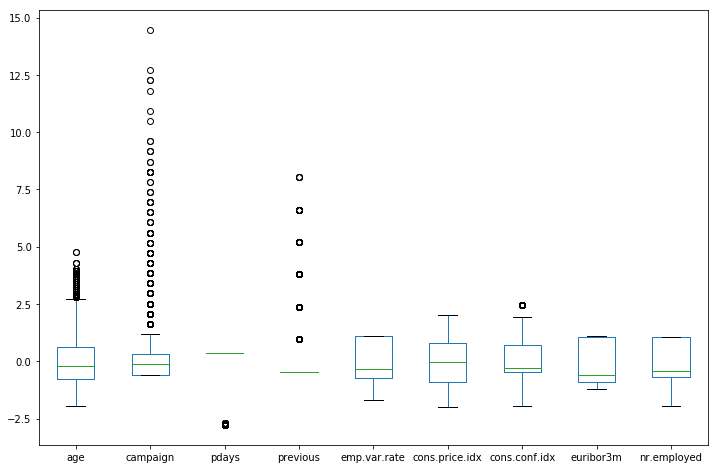

In [53]:
bank_marketing_data_stan.plot(kind='box', figsize=(12,8))

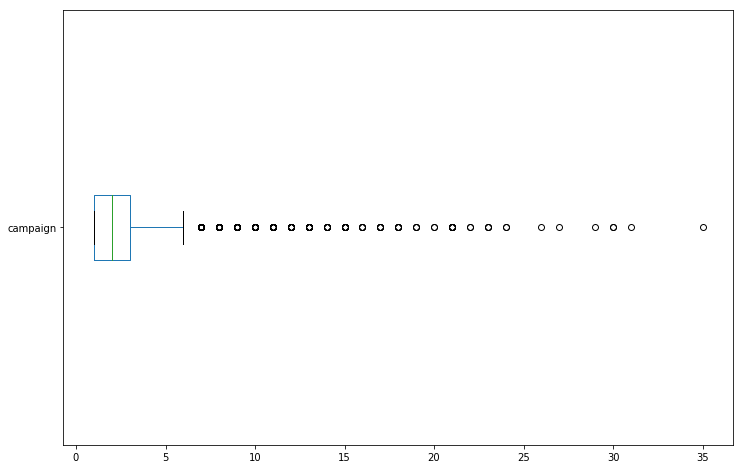

In [54]:
bank_marketing_data['campaign'].plot(kind='box', vert=False)

From the box plot, Outliers are spotted in the campaign feature

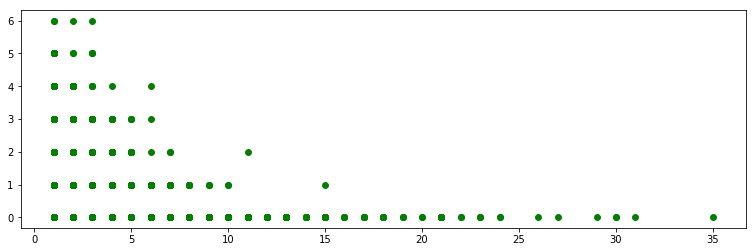

In [55]:
plt.figure(figsize=(13,4))
plt.scatter(bank_marketing_data['campaign'], bank_marketing_data['previous'], marker='o',c='g', s=35)
plt.show()

We shall calculate the IQR and identify the outliers, bearing in mind that outliers values are > Q3 + 1.5(IQR) and < Q1 - 1.5(IQR)

In [56]:
bank_marketing_data_campaign_data = bank_marketing_data['campaign']

In [57]:
Q1 = bank_marketing_data_campaign_data.quantile(0.25)
Q3 = bank_marketing_data_campaign_data.quantile(0.75)
print(Q1)

1.0


Our Interquartile range, IQR, is given as

In [58]:
IQR = Q3-Q1

In [59]:
summary = bank_marketing_data_campaign_data.describe()
Q1 = summary['25%']
Q3 = summary['75%']

min_ = summary['min']


bank_marketing_data_campaign_data.describe()

count    8665.000000
mean        2.312752
std         2.258728
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        35.000000
Name: campaign, dtype: float64

We have to create a boolean array, identifying the outliers

In [60]:
is_outlier = \
(bank_marketing_data_campaign_data < Q1 - 1.5*IQR)\
| (bank_marketing_data_campaign_data > Q3 + 1.5*IQR)

To verify the number of outliers

In [61]:
is_outlier.sum()

356

To eliminate the outliers, we shall select the data which are not outliers and store them in a dataframe

In [62]:
bank_marketing_data_no_outliers = bank_marketing_data[~is_outlier]

Let us check now and see if the outliers are removed

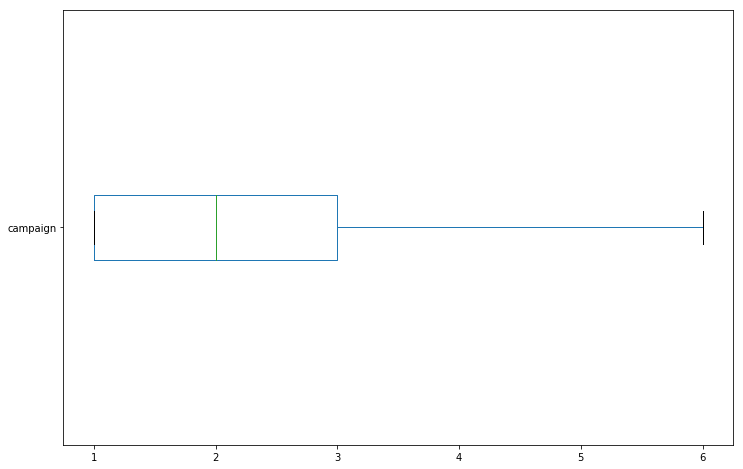

In [63]:
bank_marketing_data_no_outliers['campaign'].plot(kind='box', vert=False)

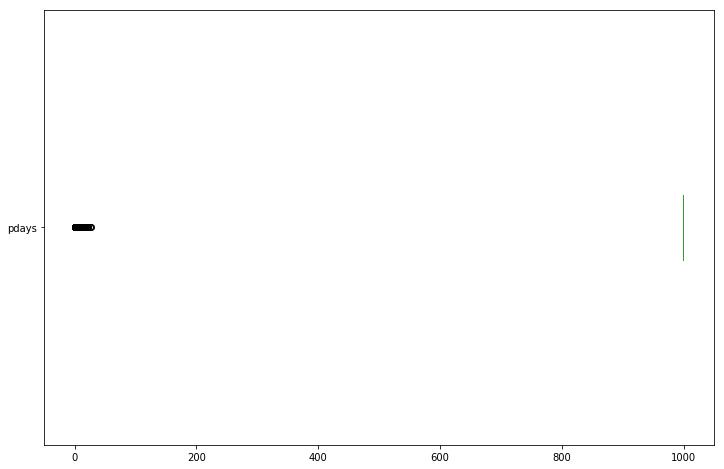

In [64]:
bank_marketing_data['pdays'].plot(kind='box', vert=False)

Let us store our dataframe in a temporary variable called bank_marketing_data_temp and introduce our new feature, contact_pdays

In [65]:
bank_marketing_data_temp = bank_marketing_data

In [66]:
bank_marketing_data['contact_pdays']=True

In [67]:
bank_marketing_data['contact_pdays'] = np.where(bank_marketing_data['pdays']>=999, 'no', 'yes')

In [68]:
bank_marketing_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,contact_pdays
0,35.0,admin.,single,university.degree,no,yes,no,cellular,may,thu,...,999.0,1.0,failure,-1.8,92.893,-46.2,1.266,5099.1,no,no
1,42.0,technician,married,professional.course,no,no,no,telephone,may,tue,...,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes,no
2,36.0,admin.,married,university.degree,no,no,no,cellular,aug,mon,...,999.0,0.0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,yes,no
3,37.0,admin.,married,high.school,no,yes,yes,telephone,jul,wed,...,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,yes,no
4,31.0,management,single,university.degree,no,yes,no,cellular,apr,thu,...,999.0,0.0,nonexistent,-1.8,93.075,-47.1,1.365,5099.1,no,no


# 1. f.  Convertion of the age feature into a categorical variable with three possible values: Young, Middle and Old. 

Let us look at the distribution of the age feature

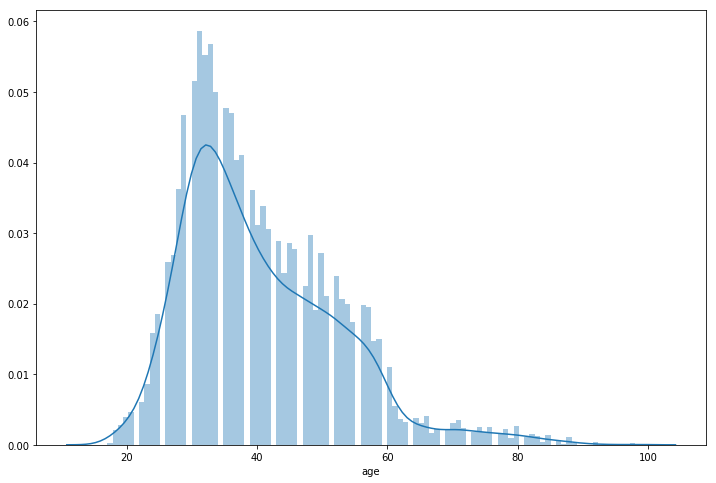

In [69]:
sns.distplot(bank_marketing_data.age, bins=100)

We shall group the different ages and assign categorical values to each grouping

In [70]:
bank_marketing_data['age']=np.where(bank_marketing_data['age']<=35,'young', (np.where(bank_marketing_data['age']>60,'old','middle')))

In [71]:
bank_marketing_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,contact_pdays
0,young,admin.,single,university.degree,no,yes,no,cellular,may,thu,...,999.0,1.0,failure,-1.8,92.893,-46.2,1.266,5099.1,no,no
1,middle,technician,married,professional.course,no,no,no,telephone,may,tue,...,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes,no
2,middle,admin.,married,university.degree,no,no,no,cellular,aug,mon,...,999.0,0.0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,yes,no
3,middle,admin.,married,high.school,no,yes,yes,telephone,jul,wed,...,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,yes,no
4,young,management,single,university.degree,no,yes,no,cellular,apr,thu,...,999.0,0.0,nonexistent,-1.8,93.075,-47.1,1.365,5099.1,no,no


In [72]:
#Below is an alternate method
#The idea here is to first of all place the ages in bins.  
#To do this, we have to first of all know the minimum ans maximum values of the ages in order to properly put them in 
#bins within a certain range.


'''
bank_marketing_data[bank_marketing_data['age']==bank_marketing_data['age'].max()]
bank_marketing_data[bank_marketing_data['age']==bank_marketing_data['age'].min()]
age_ranges = ["[{0} - {1})".format(age, age + 25) for age in range(11, 100, 25)]
age_ranges
count_unique_age_ranges = len(age_ranges)
count_unique_age_ranges
bank_marketing_data['age_range'] = pd.cut(x=bank_marketing_data['age'], bins=count_unique_age_ranges, labels=age_ranges)
bank_marketing_data['age_range'].unique()
age_range_dict = {(11 - 36):'Young', (36 - 61):'Middle', (61 - 86):'Old',\
                         (86 - 111):'Old'}
bank_marketing_data['age_range'] = \
bank_marketing_data['age_range'].map(age_range_dict)
bank_marketing_data.head() 

'''

'\nbank_marketing_data[bank_marketing_data[\'age\']==bank_marketing_data[\'age\'].max()]\nbank_marketing_data[bank_marketing_data[\'age\']==bank_marketing_data[\'age\'].min()]\nage_ranges = ["[{0} - {1})".format(age, age + 25) for age in range(11, 100, 25)]\nage_ranges\ncount_unique_age_ranges = len(age_ranges)\ncount_unique_age_ranges\nbank_marketing_data[\'age_range\'] = pd.cut(x=bank_marketing_data[\'age\'], bins=count_unique_age_ranges, labels=age_ranges)\nbank_marketing_data[\'age_range\'].unique()\nage_range_dict = {(11 - 36):\'Young\', (36 - 61):\'Middle\', (61 - 86):\'Old\',                         (86 - 111):\'Old\'}\nbank_marketing_data[\'age_range\'] = bank_marketing_data[\'age_range\'].map(age_range_dict)\nbank_marketing_data.head() \n\n'

In [73]:
# 1. g We shall identify and observe the feature space Separating the feature space and the labels

In [74]:
X=bank_marketing_data.loc[:,['age','job','marital','education','default','housing','loan','contact',\
                                                    'month','day_of_week','campaign','previous','poutcome','emp.var.rate',\
                                                   'cons.price.idx', 'cons.conf.idx','euribor3m','nr.employed','contact_pdays']]

In [75]:
Y=bank_marketing_data.loc[:,['y']]

In [76]:
bank_marketing_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,contact_pdays
0,young,admin.,single,university.degree,no,yes,no,cellular,may,thu,...,999.0,1.0,failure,-1.8,92.893,-46.2,1.266,5099.1,no,no
1,middle,technician,married,professional.course,no,no,no,telephone,may,tue,...,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes,no
2,middle,admin.,married,university.degree,no,no,no,cellular,aug,mon,...,999.0,0.0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,yes,no
3,middle,admin.,married,high.school,no,yes,yes,telephone,jul,wed,...,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,yes,no
4,young,management,single,university.degree,no,yes,no,cellular,apr,thu,...,999.0,0.0,nonexistent,-1.8,93.075,-47.1,1.365,5099.1,no,no


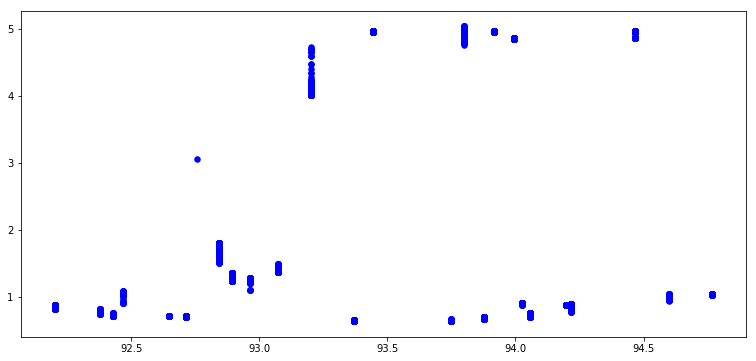

In [77]:
plt.figure(figsize=(13,6))
plt.scatter(X['cons.price.idx'], X['euribor3m'], marker='o', c='b', s=30)
plt.show()

 To Check the relationship between the Job and housing features

In [78]:
Job_housing_relationship =pd.crosstab(X['job'], X['housing'])

In [79]:
Job_housing_relationship

housing,no,unknown,yes
job,,,
admin.,1052,57,1272
blue-collar,780,40,798
entrepreneur,109,3,159
housemaid,108,6,107
management,273,11,322
retired,251,13,284
self-employed,142,5,149
services,336,18,382
student,129,11,171


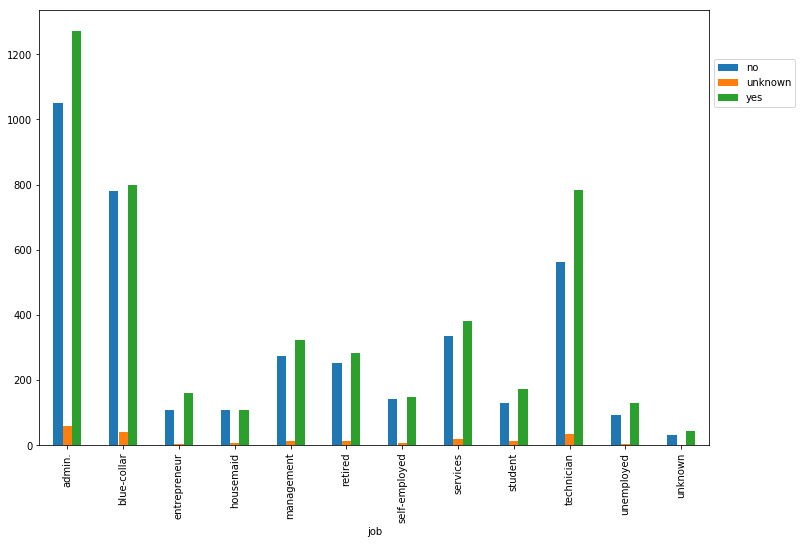

In [80]:
Job_housing_relationship.plot(kind='bar', stacked=False, figsize=(12,8),\
                            legend=True)
plt.legend(bbox_to_anchor = (1,0.9), loc='upper left')

Let us look at the relationship between previous outcome and jobs. 

In [81]:
Job_poutcome_relationship =pd.crosstab(X['job'], X['poutcome'])

In [82]:
Job_poutcome_relationship 

poutcome,failure,nonexistent,success
job,,,
admin.,280,1805,296
blue-collar,162,1395,61
entrepreneur,32,227,12
housemaid,16,178,27
management,79,453,74
retired,70,360,118
self-employed,33,247,16
services,84,608,44
student,54,175,82


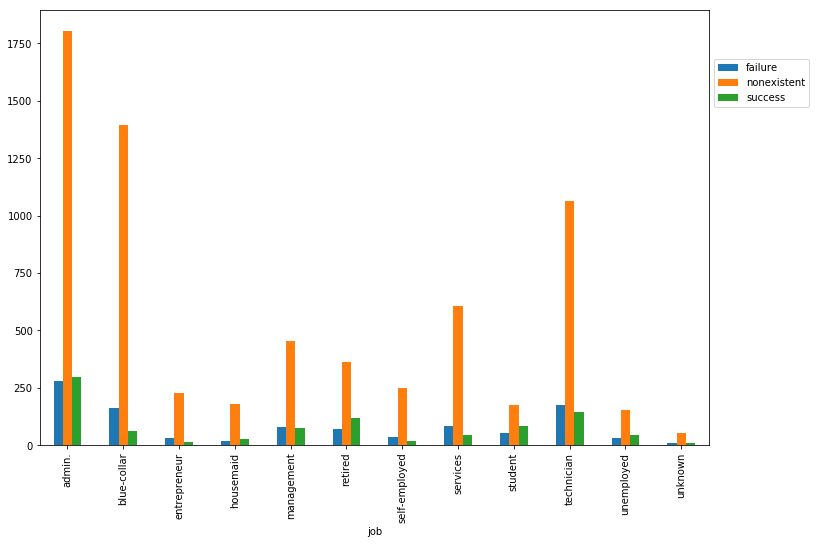

In [83]:
Job_poutcome_relationship.plot(kind='bar', stacked=False, figsize=(12,8),legend=True)
plt.legend(bbox_to_anchor = (1,0.9), loc='upper left')

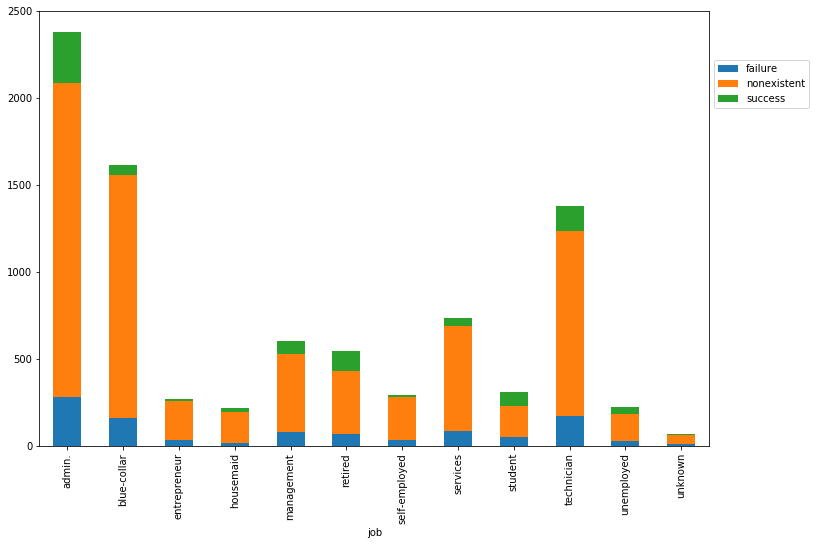

In [84]:
# We can also view the graph in a stacked format
Job_poutcome_relationship.plot(kind='bar', stacked=True, figsize=(12,8),legend=True)
plt.legend(bbox_to_anchor = (1,0.9), loc='upper left')

 We can see from the graph, that the lowest number of successes across jobs and the lowest ratio of 
successes was with the entrepreneurs,
while the highest number of successes was with the admin.

Let us look at the relationship between education and previous outcomes. 

In [85]:
education_poutcome_relationship =pd.crosstab(X['education'], X['poutcome'])

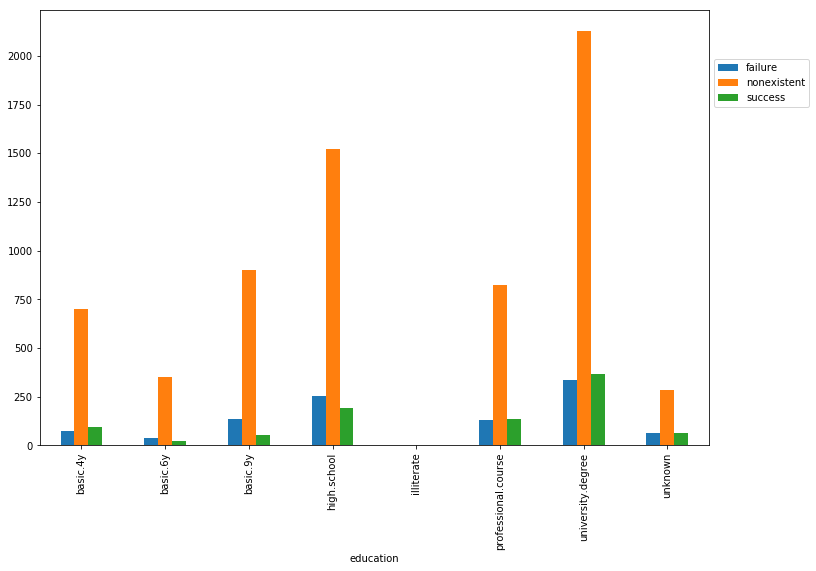

In [86]:
education_poutcome_relationship.plot(kind='bar', stacked=False, figsize=(12,8),legend=True)
plt.legend(bbox_to_anchor = (1,0.9), loc='upper left')

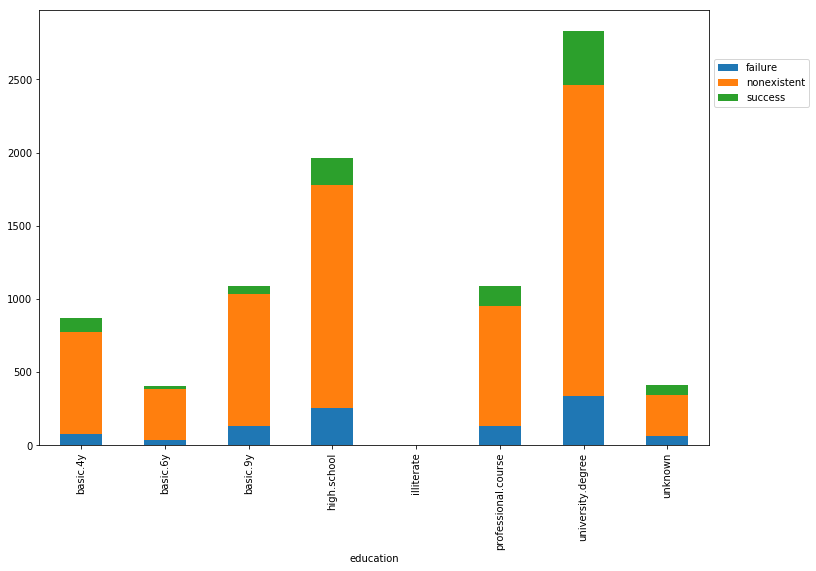

In [87]:
# Let us view the graph in a stacked format
education_poutcome_relationship.plot(kind='bar', stacked=True, figsize=(12,8),legend=True)
plt.legend(bbox_to_anchor = (1,0.9), loc='upper left')

 From the graph we can see that those with University degree were contacted more frequently 
 and had the highest number of successes. 

In [88]:
#  We shall now compute  and  plot  the  correlation  matrix  between  all  numerical features
# and comment on the insights we may gain.

In [89]:
correlation_matrix = bank_marketing_data_numerics_only.corr()

 Let us now look at the correlation matrix

In [90]:
print (correlation_matrix)

                     age  campaign     pdays  previous  emp.var.rate  \
age             1.000000  0.003393 -0.064854  0.057925     -0.051228   
campaign        0.003393  1.000000  0.091319 -0.097608      0.198076   
pdays          -0.064854  0.091319  1.000000 -0.706478      0.334766   
previous        0.057925 -0.097608 -0.706478  1.000000     -0.381185   
emp.var.rate   -0.051228  0.198076  0.334766 -0.381185      1.000000   
cons.price.idx -0.013878  0.134483  0.037457 -0.059479      0.716742   
cons.conf.idx   0.132091 -0.026061 -0.155394  0.072276     -0.069737   
euribor3m      -0.050353  0.185043  0.386340 -0.446842      0.956564   
nr.employed    -0.079163  0.186615  0.472024 -0.520169      0.866014   

                cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
age                  -0.013878       0.132091  -0.050353    -0.079163  
campaign              0.134483      -0.026061   0.185043     0.186615  
pdays                 0.037457      -0.155394   0.386340     0.

Let us do a graphical representation of the correlation matrix as a color map

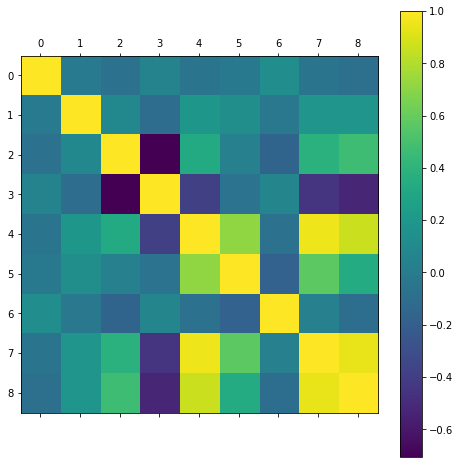

In [91]:
plt.matshow(correlation_matrix)
plt.colorbar()

We can replot to add the labels of the features for better vissualisation

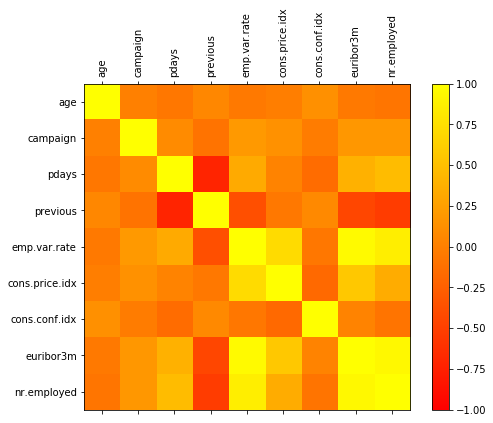

In [92]:
fig, ax = plt.subplots(figsize=(8,6))
im = ax.matshow(correlation_matrix, cmap = 'autumn', vmin = -1, vmax = 1,)
plt.xticks(range(len(bank_marketing_data_numerics_only.columns)), bank_marketing_data_numerics_only.columns, rotation=90)
plt.yticks(range(len(bank_marketing_data_numerics_only.columns)), bank_marketing_data_numerics_only.columns)
plt.colorbar(im)
plt.show()

 From the correlation map above, we can infer that: 
 
 1. We can see that the data is not linear. It is assymetric.
 2. Only a few of the features are correlated. As a result of this, feature combination will be necessary.
 3. There is a strong correlation between euribor3m and emp.var.rate
 4. There is a strong correlation between emp.var.rate and nr.employed

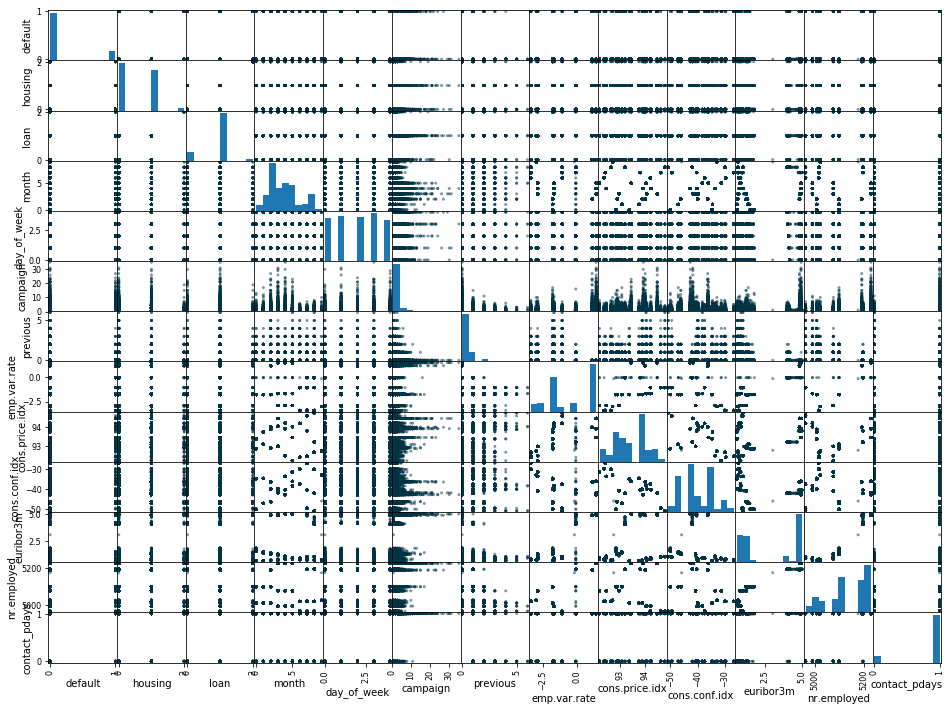

In [213]:
pd.plotting.scatter_matrix(X, figsize=(16,12), color='#003344')
plt.show()

# 1.i. Conversion of the categorical features to numerical ones.

 To convert the categorical features to numerical ones;
 1. we first observe and note the unique values
 2. To encode them into a numeric format we first define a dictionary that will specify the mapping


In [94]:
X['education'].unique()

array(['university.degree', 'professional.course', 'high.school',
       'unknown', 'basic.9y', 'basic.4y', 'basic.6y', 'illiterate'], dtype=object)

 To encode them into a numeric format let's first define a dictionary that will specify the mapping


In [95]:
education_dictionary= {'illiterate':0,'basic.4y':1, 'basic.6y':2, 'basic.9y':3,'unknown':4,'high.school':5,'professional.course':6,\
                         'university.degree':7}

Let's examine the features

In [96]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8665 entries, 0 to 9279
Data columns (total 19 columns):
age               8665 non-null object
job               8665 non-null object
marital           8665 non-null object
education         8665 non-null object
default           8665 non-null object
housing           8665 non-null object
loan              8665 non-null object
contact           8665 non-null object
month             8665 non-null object
day_of_week       8665 non-null object
campaign          8665 non-null float64
previous          8665 non-null float64
poutcome          8665 non-null object
emp.var.rate      8665 non-null float64
cons.price.idx    8665 non-null float64
cons.conf.idx     8665 non-null float64
euribor3m         8665 non-null float64
nr.employed       8665 non-null float64
contact_pdays     8665 non-null object
dtypes: float64(7), object(12)
memory usage: 1.6+ MB


We first observe and note the unique values

In [97]:
X['month'].unique()

array(['may', 'aug', 'jul', 'apr', 'jun', 'nov', 'sep', 'oct', 'mar', 'dec'], dtype=object)

To encode them into a numeric format let's first define a dictionary that will specify the mapping

In [98]:
month_dictionary= {'mar':0,'apr':1, 'may':2, 'jun':3,'jul':4,'aug':5,'sep':6,\
                         'oct':7,'nov':8,'dec':9}

In [99]:
X['month'] =X['month'].map(month_dictionary)

In [100]:
X['day_of_week'].unique()

array(['thu', 'tue', 'mon', 'wed', 'fri'], dtype=object)

In [101]:
day_of_week_dictionary= {'mon':0,'tue':1, 'wed':2, 'thu':3,'fri':4}

In [102]:
X['day_of_week'] =X['day_of_week'].map(day_of_week_dictionary)

In [103]:
X.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,contact_pdays
0,young,admin.,single,university.degree,no,yes,no,cellular,2,3,1.0,1.0,failure,-1.8,92.893,-46.2,1.266,5099.1,no
1,middle,technician,married,professional.course,no,no,no,telephone,2,1,1.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,middle,admin.,married,university.degree,no,no,no,cellular,5,0,2.0,0.0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
3,middle,admin.,married,high.school,no,yes,yes,telephone,4,2,2.0,0.0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
4,young,management,single,university.degree,no,yes,no,cellular,1,3,1.0,0.0,nonexistent,-1.8,93.075,-47.1,1.365,5099.1,no
5,young,admin.,single,unknown,no,no,no,telephone,3,1,7.0,0.0,nonexistent,-2.9,92.963,-40.8,1.286,5076.2,no
6,middle,blue-collar,married,basic.9y,no,no,no,telephone,2,2,5.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,middle,blue-collar,single,basic.9y,no,no,yes,cellular,2,3,2.0,0.0,nonexistent,-1.8,92.893,-46.2,1.327,5099.1,no
8,old,retired,married,university.degree,no,yes,no,cellular,8,3,1.0,6.0,success,-1.1,94.767,-50.8,1.031,4963.6,yes
9,old,retired,married,basic.4y,no,no,no,cellular,6,1,1.0,2.0,success,-3.4,92.379,-29.8,0.770,5017.5,yes


In [104]:
X['default'].unique()

array(['no', 'unknown'], dtype=object)

In [105]:
default_dictionary= {'no':0,'unknown':1}

In [106]:
X['default'] =X['default'].map(default_dictionary)

In [107]:
X['housing'].value_counts()

yes        4598
no         3864
unknown     203
Name: housing, dtype: int64

In [108]:
housing_dictionary= {'yes':0,'no':1,'unknown':2}

In [109]:
X['housing'] =X['housing'].map(housing_dictionary)

In [110]:
X['loan'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [111]:
loan_dictionary={'yes':0,'no':1,'unknown':2}

In [112]:
X['loan'] =X['loan'].map(loan_dictionary)

In [113]:
X['contact_pdays'].value_counts()

no     7663
yes    1002
Name: contact_pdays, dtype: int64

In [114]:
contact_pdays_dictionary={'yes':0,'no':1}

In [115]:
X['contact_pdays']=X['contact_pdays'].map(contact_pdays_dictionary)

In [116]:
Y['y'].value_counts()

yes    4469
no     4196
Name: y, dtype: int64

In [117]:
Y_dict={'yes':0,'no':1}

In [118]:
Y['y'] =Y['y'].map(Y_dict)

In [119]:
X_new = pd.get_dummies(X)

In [120]:
X_new.head()

,default,housing,loan,month,day_of_week,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,0,1,2,3,1.0,1.0,-1.8,92.893,-46.2,...,0,0,0,1,0,1,0,1,0,0
1,0,1,1,2,1,1.0,0.0,1.1,93.994,-36.4,...,0,0,1,0,0,0,1,0,1,0
2,0,1,1,5,0,2.0,0.0,1.4,93.444,-36.1,...,0,0,0,1,0,1,0,0,1,0
3,0,0,0,4,2,2.0,0.0,1.4,93.918,-42.7,...,1,0,0,0,0,0,1,0,1,0
4,0,0,1,1,3,1.0,0.0,-1.8,93.075,-47.1,...,0,0,0,1,0,1,0,0,1,0


In [121]:
X_new.describe()

,default,housing,loan,month,day_of_week,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
count,8665.000000,8665.000000,8665.000000,8665.000000,8665.000000,8665.000000,8665.000000,8665.000000,8665.000000,8665.000000,...,8665.000000,8665.000000,8665.000000,8665.000000,8665.000000,8665.000000,8665.000000,8665.000000,8665.000000,8665.000000
mean,0.160531,0.492787,0.873976,3.698096,1.989498,2.312752,0.321870,-0.513226,93.477119,-40.166451,...,0.226890,0.000577,0.125678,0.326601,0.047317,0.717715,0.282285,0.118061,0.775072,0.106867
std,0.367119,0.544828,0.396252,2.207658,1.395318,2.258728,0.706887,1.722131,0.635982,5.386935,...,0.418845,0.024016,0.331505,0.468997,0.212328,0.450137,0.450137,0.322699,0.417559,0.308962
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-3.400000,92.201000,-50.800000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,0.000000,-1.800000,92.893000,-42.700000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,1.000000,3.000000,2.000000,2.000000,0.000000,-1.100000,93.444000,-41.800000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,1.000000,1.000000,5.000000,3.000000,3.000000,0.000000,1.400000,93.994000,-36.400000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,2.000000,2.000000,9.000000,4.000000,35.000000,6.000000,1.400000,94.767000,-26.900000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 1. j. Now we shall perform a PCA analysis on the feature space.

In [122]:
X_new.info()
X_new.isnull().sum().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8665 entries, 0 to 9279
Data columns (total 45 columns):
default                          8665 non-null int64
housing                          8665 non-null int64
loan                             8665 non-null int64
month                            8665 non-null int64
day_of_week                      8665 non-null int64
campaign                         8665 non-null float64
previous                         8665 non-null float64
emp.var.rate                     8665 non-null float64
cons.price.idx                   8665 non-null float64
cons.conf.idx                    8665 non-null float64
euribor3m                        8665 non-null float64
nr.employed                      8665 non-null float64
contact_pdays                    8665 non-null int64
age_middle                       8665 non-null uint8
age_old                          8665 non-null uint8
age_young                        8665 non-null uint8
job_admin.                     

0

In [123]:
sc = StandardScaler()
X_new_std = sc.fit_transform(X_new)

 Next we apply the PCA method and create an instance of PCA object without selecting any Principal Components

In [124]:
pca = PCA(n_components=None)

In [125]:
X_transformed = pca.fit_transform(X_new_std)

 Let us check the transformed feature space

In [126]:
print(X_transformed.shape)

(8665, 45)


 Let us check the amount of variance explained by this transformation

In [127]:
 pca.explained_variance_ratio_

array([  1.29287340e-01,   6.68322956e-02,   5.06883595e-02,
         4.61400619e-02,   4.16048319e-02,   3.99448212e-02,
         3.56820727e-02,   3.19929692e-02,   3.15024788e-02,
         2.96322061e-02,   2.89821246e-02,   2.81677014e-02,
         2.61180285e-02,   2.56962239e-02,   2.52984724e-02,
         2.44901456e-02,   2.36357403e-02,   2.34016240e-02,
         2.32876764e-02,   2.21823189e-02,   2.17344382e-02,
         2.13120979e-02,   2.09479254e-02,   2.01877969e-02,
         1.98225729e-02,   1.82968376e-02,   1.77773405e-02,
         1.70515220e-02,   1.66972639e-02,   1.52953139e-02,
         1.35187002e-02,   1.18132248e-02,   9.21520784e-03,
         8.83264079e-03,   7.44471614e-03,   3.85746114e-03,
         9.77251124e-04,   4.85794853e-04,   1.64401136e-04,
         5.76969812e-32,   3.52449836e-32,   3.07647120e-32,
         1.93624225e-32,   1.30048631e-32,   2.13821859e-33])

In [128]:
 print('The total explained variance by this tranformation is {0:.2f}'\
      .format(pca.explained_variance_ratio_.sum()))

The total explained variance by this tranformation is 1.00


In [129]:
# Let us see the explained variance ratio contribution for each Principal Component

In [130]:
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)

[  1.29287340e-01   6.68322956e-02   5.06883595e-02   4.61400619e-02
   4.16048319e-02   3.99448212e-02   3.56820727e-02   3.19929692e-02
   3.15024788e-02   2.96322061e-02   2.89821246e-02   2.81677014e-02
   2.61180285e-02   2.56962239e-02   2.52984724e-02   2.44901456e-02
   2.36357403e-02   2.34016240e-02   2.32876764e-02   2.21823189e-02
   2.17344382e-02   2.13120979e-02   2.09479254e-02   2.01877969e-02
   1.98225729e-02   1.82968376e-02   1.77773405e-02   1.70515220e-02
   1.66972639e-02   1.52953139e-02   1.35187002e-02   1.18132248e-02
   9.21520784e-03   8.83264079e-03   7.44471614e-03   3.85746114e-03
   9.77251124e-04   4.85794853e-04   1.64401136e-04   5.76969812e-32
   3.52449836e-32   3.07647120e-32   1.93624225e-32   1.30048631e-32
   2.13821859e-33]


Let's plot a graph to visualise the explained variance ratio contribution 
 of each of the Principal Components, using a bar chart, which is most suitable.


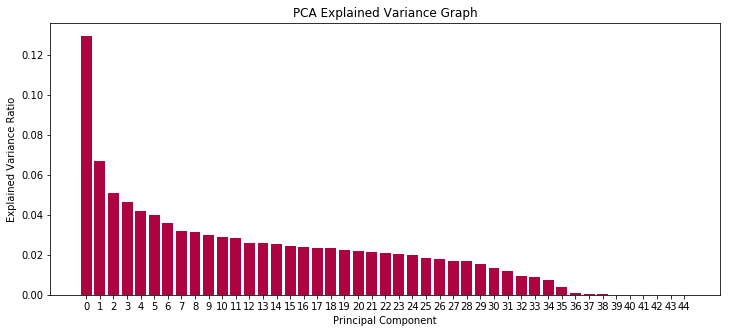

In [131]:
plt.figure(figsize=(12,5))
plt.bar(range(len(explained_variance_ratio)),\
        explained_variance_ratio, color='#ae0341')
plt.xticks(range(len(explained_variance_ratio)), range(len(explained_variance_ratio)))
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance Graph')
plt.show()

Let us check for the number of Principal Components that we should choose to ensure that our transformation captures 80%
of the original dataset's variance

In [132]:
cumulative_explained_ratio = explained_variance_ratio.cumsum()

<Container object of 45 artists>

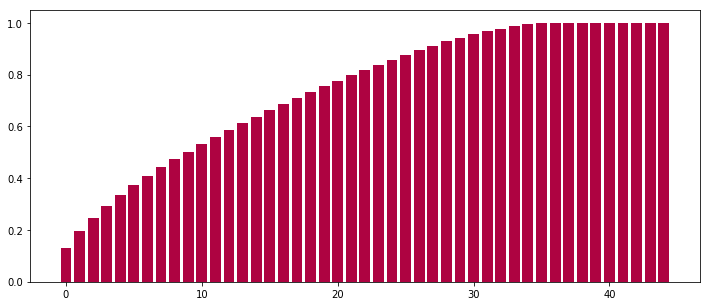

In [133]:
plt.figure(figsize=(12,5))
plt.bar(range(len(explained_variance_ratio)),\
        cumulative_explained_ratio, color='#ae0341')

 From the graph, we see that the cumulative sum of ratios reaches 80% at the 22nd element. Thus, we will need 
 22 Principal Components

From the graph, we see that the cumulative sum of ratios reaches 100% at the 36th element. Thus, we will need 
36 Principal Components

# 2.  We shall use our processed dataset to fit some models and evaluate them. 

# 2.a Logistic Regression mode

Before we shall train our Perceptron classifier, we shall split our dataset into training and testing datasets

In [134]:
X_train, X_test, y_train, y_test= train_test_split(X_transformed, Y, test_size = 0.25, random_state=0)

We shaall initialise our classifier by instantiating a Logistic Regression object. 
Let C be the inverse of the regularisation parameter
random_state simply allows for the result to be exactly re-producible

In [135]:
lr_classifier = LogisticRegression(C = 10000, random_state=1)

We shall train our classifier using our training dataset (features and labels)

In [136]:
lr_classifier.fit(X_train, y_train)

C:\Users\compag\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

We shall now test our classifier's performance

In [137]:
y_pred = lr_classifier.predict(X_test)

In [138]:
y_pred_probs = lr_classifier.predict_proba(X_test)


y_pred_probs

array([[ 0.49290402,  0.50709598],
       [ 0.37957587,  0.62042413],
       [ 0.2655526 ,  0.7344474 ],
       ..., 
       [ 0.21309314,  0.78690686],
       [ 0.72663269,  0.27336731],
       [ 0.29010318,  0.70989682]])

In [139]:
y_pred_probs[5:20]

array([[ 0.84213605,  0.15786395],
       [ 0.22514057,  0.77485943],
       [ 0.83552216,  0.16447784],
       [ 0.6143533 ,  0.3856467 ],
       [ 0.34271007,  0.65728993],
       [ 0.81907073,  0.18092927],
       [ 0.36775744,  0.63224256],
       [ 0.88125066,  0.11874934],
       [ 0.27495052,  0.72504948],
       [ 0.54151765,  0.45848235],
       [ 0.44258205,  0.55741795],
       [ 0.90004391,  0.09995609],
       [ 0.31646824,  0.68353176],
       [ 0.91913588,  0.08086412],
       [ 0.29261074,  0.70738926]])

To show how the percentage Accuracy of how well our model predicts in the testing data

In [140]:
lr_classifier.score(X_test,y_test)

0.72958006460544533

In [141]:
conf_matrix_lr = confusion_matrix(y_test, y_pred)

In [142]:
conf_matrix_lr

array([[772, 358],
       [228, 809]], dtype=int64)

Let us plot the confusion matrix for the Logistic Regression

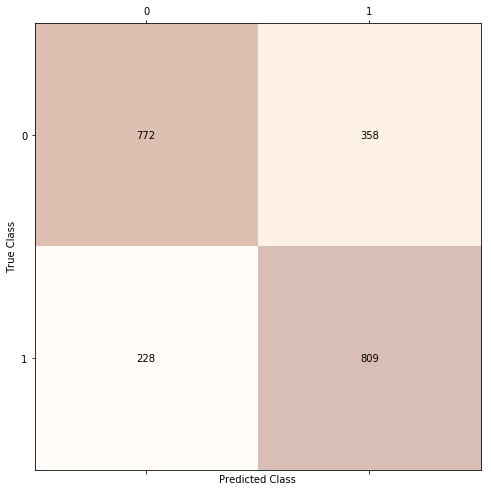

In [143]:
plt.figure(figsize=(8,8))
plt.matshow(conf_matrix_lr, cmap = 'Oranges', alpha = 0.3)
for i in range(conf_matrix_lr.shape[0]):
    for j in range(conf_matrix_lr.shape[1]):
        plt.text(x=j, y=i, s=conf_matrix_lr[i,j], va='center', ha='center')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

Let us check to see  our recall score of the logistic regression

In [144]:
recall = recall_score(y_test, y_pred)
print("The model predicts the sign up rate with a probability of {0:.2f}"\
      .format(recall))

The model predicts the sign up rate with a probability of 0.78


Let us now look at the precision level of our Logistic Regression

In [145]:
precision = precision_score(y_test, y_pred)
print("Our model precision is {0:.2f}".format(precision))

Our model precision is 0.69


 # 2.b. Let us look at a Random Forest model using the entropy information gain criterion and 20 trees

We shall utilize the data which we have already split into testing and training data and apply them to the model

In [146]:
rf_classifier = RandomForestClassifier(criterion='entropy',n_estimators=20, random_state= 2)

rf_classifier.fit(X_train, y_train)

C:\Users\compag\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

In [147]:
Y_pred_rf = rf_classifier.predict(X_test)

Y_pred_rf

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

Let us check the accuracy score for the Random Forest 

In [148]:
print ("The accuracy score for the Random Forest is:")
rf_classifier.score(X_test,y_test)

The accuracy score for the Random Forest is:


0.70696815874480845

In [149]:
rf_classifier.feature_importances_

array([ 0.10698205,  0.02406012,  0.03738356,  0.02052431,  0.02718995,
        0.0202591 ,  0.01962893,  0.02042424,  0.02115608,  0.02048131,
        0.0336115 ,  0.01939909,  0.02036585,  0.01978507,  0.01869121,
        0.02095669,  0.01967004,  0.01906063,  0.01899903,  0.01966436,
        0.02350922,  0.02091545,  0.0235391 ,  0.02106671,  0.01984993,
        0.01787277,  0.02099409,  0.01894253,  0.0218483 ,  0.02100755,
        0.02020527,  0.02846161,  0.02016941,  0.03458546,  0.02215153,
        0.04621376,  0.03416087,  0.0279353 ,  0.028278  ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [150]:
conf_matrix_rf = confusion_matrix(y_test, Y_pred_rf)
print(conf_matrix_rf)

[[821 309]
 [326 711]]


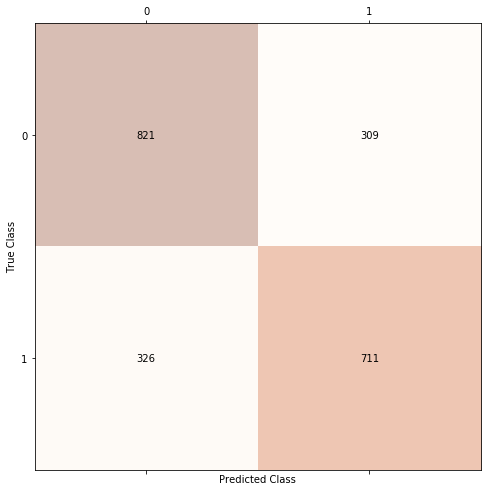

In [151]:
plt.figure(figsize=(8,8))
plt.matshow(conf_matrix_rf, cmap = 'Oranges', alpha = 0.3)
for i in range(conf_matrix_rf.shape[0]):
    for j in range(conf_matrix_rf.shape[1]):
        plt.text(x=j, y=i, s=conf_matrix_rf[i,j], va='center', ha='center')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

Let us check the recall score for the random forest

In [152]:
recall = recall_score(y_test, Y_pred_rf)
print("The recall rate for the random forest model is: {0:.5f}"\
      .format(recall))

The recall rate for the random forest model is: 0.68563


Let us check the Precision Score for the Random Forest

In [153]:
precision = precision_score(y_test, Y_pred_rf)
print("Our random's forest model precision is {0:.2f}".format(precision))

Our random's forest model precision is 0.70


# 2c. Let us look at the Neural   Network   model    

In [154]:
mlp = MLPClassifier(activation='logistic',hidden_layer_sizes=(10,10,5), alpha=1, random_state=0)

mlp.fit(X_train, y_train)

C:\Users\compag\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='logistic', alpha=1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [155]:
print('Training accuracy score {0:4f}'.format(mlp.score(X=X_train, y=y_train)))
print('Testing accuracy score {0:4f}'.format(mlp.score(X=X_test, y=y_test)))

Training accuracy score 0.513850
Testing accuracy score 0.521458


In [156]:
Y_pred_mlpc =mlp.predict(X_test)

In [157]:
conf_matrix_mlpc = confusion_matrix(y_test, Y_pred_mlpc)
print(conf_matrix_mlpc)

[[1130    0]
 [1037    0]]


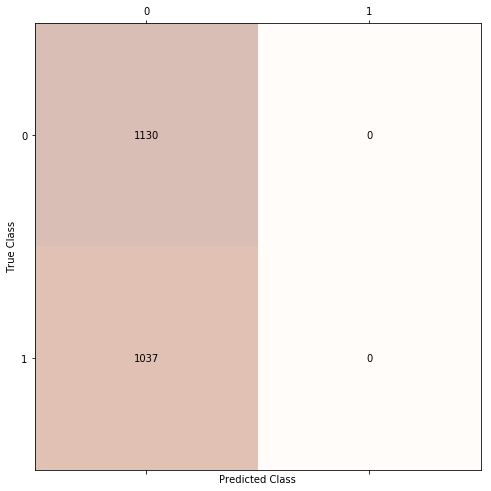

In [158]:
plt.figure(figsize=(8,8))
plt.matshow(conf_matrix_mlpc, cmap = 'Oranges', alpha = 0.3)
for i in range(conf_matrix_mlpc.shape[0]):
    for j in range(conf_matrix_mlpc.shape[1]):
        plt.text(x=j, y=i, s=conf_matrix_mlpc[i,j], va='center', ha='center')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

From our plot above, the Neural Network is not a good model for our dataset

In [159]:
y_pred_mlpc=mlp.predict(X_test)

Let us look at the Recall Score for our Neural Network

In [160]:
recall = recall_score(y_test, Y_pred_mlpc)
print("The recall rate for the neural network model is {0:.5f}"\
      .format(recall))

The recall rate for the neural network model is 0.00000


Let us look at the Precision rate of our neural network

In [161]:
precision__mlpc = precision_score(y_test, Y_pred_mlpc)
print("The precision rate for the neural network is {0:.2f}".format(precision))

The precision rate for the neural network is 0.70


C:\Users\compag\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Let us plot the ROC curve to visualize the model that we would select to predict whether a customer will purchase/sign-up for a term deposit


In [162]:
lr_1_pred_probs = lr_classifier.predict_proba(X_test)
lr_2_pred_probs = rf_classifier.predict_proba(X_test)
lr_3_pred_probs = mlp.predict_proba(X_test)
print('Score for Logistic Regression is {0:.4f}'.\
      format(lr_classifier.score(X_test, y_test)))
print('Score for Random Forest {0:.4f}'.\
      format(rf_classifier.score(X_test, y_test)))
print('Score for Neural Network is {0:.4f}'.\
      format(mlp.score(X_test, y_test)))

Score for Logistic Regression is 0.7296
Score for Random Forest 0.7070
Score for Neural Network is 0.5215


In [163]:
fpr1, tpr1, thres1 = roc_curve(y_test, lr_1_pred_probs[:,1], pos_label=1)
fpr2, tpr2, thres2 = roc_curve(y_test, lr_2_pred_probs[:,1], pos_label=1)
fpr3, tpr3, thres3 = roc_curve(y_test, lr_3_pred_probs[:,1], pos_label=1)

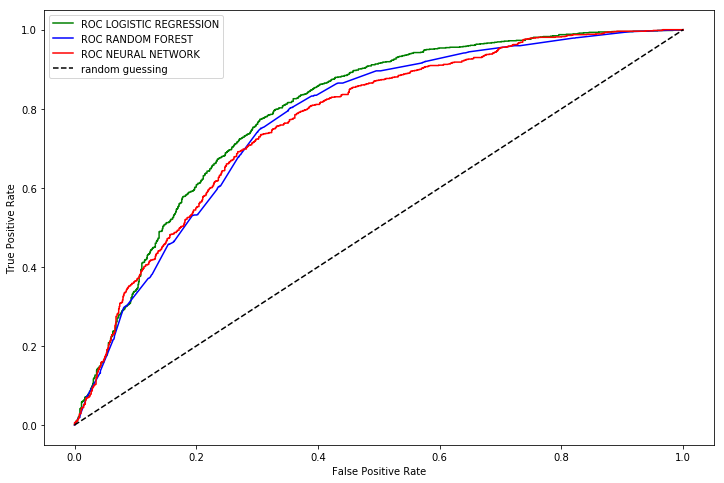

In [164]:
plt.figure(figsize=(12,8))
plt.plot(fpr1, tpr1, color='g', label='ROC LOGISTIC REGRESSION')
plt.plot(fpr2, tpr2, color='b', label='ROC RANDOM FOREST')
plt.plot(fpr3, tpr3, color='r', label='ROC NEURAL NETWORK')
plt.plot([0,1],[0,1], ls='--', color = 'k', label = 'random guessing')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

From the plot above, it can be said that the Logistic Regression Model, when applied on the dataset, for the most part of the ROC curve, performed better, showing a high true positive rate. As a result, the Logistic Regression Model is a better better predictive model for our dataset. This model,will thus predict more accurately,whether a customer will purchase/sign-up for a term deposit.

# Exercise 3: We explore the possibility if changes in various parameters to lead to improvements in our model's predictive accuracy.

Let us first define our pipeline

In [165]:
pipe_lr = Pipeline([('lr', LogisticRegression(C=0.0001, random_state=1))])

We shall begin with different values of the regularization parameter lambda, and assess the performance of our classifier

In [166]:
scores= cross_val_score(estimator=pipe_lr, X=X_train, y=y_train, cv=10, n_jobs=-1)

for c in [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]:
    pipe_lr= Pipeline([('lr', LogisticRegression(C=c, random_state=1))])
    scores= cross_val_score(estimator=pipe_lr, X=X_train, y=y_train, cv=10, n_jobs=-1)
    print('Training (validation) accuracy for parameter C={0} is {1:.4f}'.format(c, np.mean(scores)))

Training (validation) accuracy for parameter C=0.0001 is 0.7131
Training (validation) accuracy for parameter C=0.001 is 0.7190
Training (validation) accuracy for parameter C=0.01 is 0.7248
Training (validation) accuracy for parameter C=0.1 is 0.7244
Training (validation) accuracy for parameter C=1 is 0.7245
Training (validation) accuracy for parameter C=10 is 0.7248
Training (validation) accuracy for parameter C=100 is 0.7248
Training (validation) accuracy for parameter C=1000 is 0.7248
Training (validation) accuracy for parameter C=10000 is 0.7248


 The best score is achieved when regularization parameter is 10.


We shall look at different numbers of trees to see if there is an improvememnt in the predictive accuracy.
From our observation, we see that despite the increase in the number of trees, it still does not attain the accuracy of the logistic regression model. 

In [167]:
for n in [5,10,30,40,50,200,500]:
    rf_pipeline = RandomForestClassifier(criterion='entropy',n_estimators=n, random_state= 2)
    scores= cross_val_score(estimator=rf_pipeline, X=X_train, y=y_train, cv=10, n_jobs=-1)
    print('Training accuracy for parameter various parameters n= is {1:.4f}'.format(c, np.mean(scores)))

Training accuracy for parameter various parameters n= is 0.6657
Training accuracy for parameter various parameters n= is 0.6713
Training accuracy for parameter various parameters n= is 0.6942
Training accuracy for parameter various parameters n= is 0.6999
Training accuracy for parameter various parameters n= is 0.6978
Training accuracy for parameter various parameters n= is 0.7050
Training accuracy for parameter various parameters n= is 0.7051


We get our best score of 0.7051 when n, the number of trees is 500

We shall now examine our regularization parameter 10 for the neural network model 

In [168]:
mlp2 = MLPClassifier(activation='logistic',hidden_layer_sizes=(10,10,5),alpha=10, random_state=0)

mlp2.fit(X_train, y_train)

C:\Users\compag\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='logistic', alpha=10, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [169]:
print('Training accuracy score {0:4f}'.format(mlp2.score(X=X_train, y=y_train)))
print('Testing accuracy score {0:4f}'.format(mlp2.score(X=X_test, y=y_test)))

Training accuracy score 0.513850
Testing accuracy score 0.521458


# Exercise 4: Cluster Analysis

A. Perform  a  clustering  analysis  using  the  aforementioned  features 

 We shall use our prepared dataframe, bank_marketing _data

In [170]:
cluster_dataframe=bank_marketing_data.loc[:,['job','marital','education','age']]

In [171]:
cluster_dataframe.head()

,job,marital,education,age
0,admin.,single,university.degree,young
1,technician,married,professional.course,middle
2,admin.,married,university.degree,middle
3,admin.,married,high.school,middle
4,management,single,university.degree,young


Let us now convert our features to ordinal data 



In [172]:
education_dictionary= {'illiterate':0,'basic.4y':1, 'basic.6y':2, 'basic.9y':3,'unknown':4,'high.school':5,'professional.course':6,\
                         'university.degree':7}

In [173]:
cluster_dataframe['education']=cluster_dataframe['education'].map(education_dictionary)

In [174]:
# Age is converted as an ordinal categorical variable: We first group the data into Young. Middle and old and then 
# Convert again as Young=1, middle=2, old=3

In [175]:
age_dictionary= {'Young':1,'Middle':2,'Old':3}

In [178]:
cluster_dataframe['age']=np.where(cluster_dataframe['age']<=35,'Young', (np.where(cluster_dataframe['age']>60,'Old','Middle')))

In [179]:
cluster_dataframe['age']=cluster_dataframe['age'].map(age_dictionary)

In [180]:
cluster_dataframe_converted = pd.get_dummies(cluster_dataframe)

In [181]:
cluster_dataframe_converted.head(4)

,education,age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown
0,7,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,6,2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,7,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,5,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [182]:
#We standardize the features to be used for clustering

In [183]:
sc = StandardScaler()

In [184]:
sc.fit(cluster_dataframe_converted)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [185]:
cluster_dataframe_converted_scaled = sc.transform(cluster_dataframe_converted)

In [186]:
X_std = cluster_dataframe_converted_scaled

Let us now see our dataset

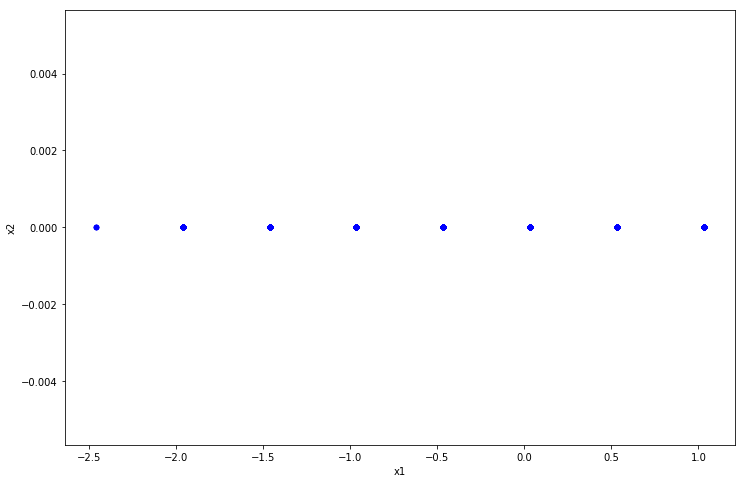

In [187]:
plt.scatter(X_std[:,0], X_std[:,1], color ='b', s=20)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

Let us now run the clustering with 5 clusters 

In [188]:
km1 = KMeans(n_clusters=5, init='random', max_iter=300, random_state=0)

In [189]:
y_km1 = km1.fit_predict(X_std)

In [190]:
print("These are the cluster labels assigned to each data point")
y_km1

These are the cluster labels assigned to each data point


array([0, 1, 1, ..., 1, 1, 1])

In [191]:
sse = km1.inertia_

sse


102998.39598056691

The inertia attribute, which is the sum of squared distances of samples to the nearest cluster centre is a high value.

Let us increase the number of clusters to 15 to see if there are any changes in the SSE. 

In [192]:
km = KMeans(n_clusters=15, init='random', max_iter=300, random_state=0)

In [193]:
y_km = km.fit_predict(X_std)
print("These are the cluster labels assigned to each data point")
y_km

These are the cluster labels assigned to each data point


array([13,  5, 11, ..., 11,  9, 10])

In [194]:
sse2 = km.inertia_

sse2

28212.622102773137

Our Inertia is still a high value

The SSE decreases greatly till the we have 15 clusters. 


Thus, we recommend increase of the number of clusters to 15 for our demographic dataset.

 We shall apply the elbow method and we find that the number of 5 clusters is erroneous for this dataset. 


In [195]:
distortions = []

In [196]:
for k in range(1, 30):
    km = KMeans(n_clusters=k,\
               max_iter=300,\
               random_state=0)
    km.fit(cluster_dataframe_converted_scaled)
    distortions.append(km.inertia_)

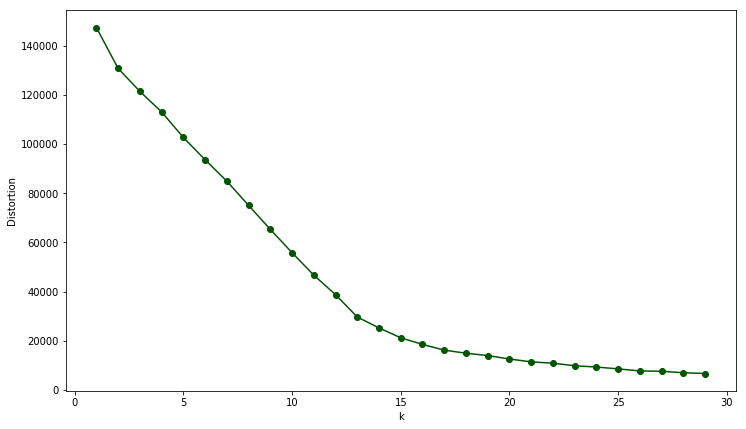

In [197]:
plt.figure(figsize=(12,7))
plt.plot(range(1, 30), distortions, marker = 'o', color = '#005500')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.savefig('Clustering Dataset - Confused Distortion.png')



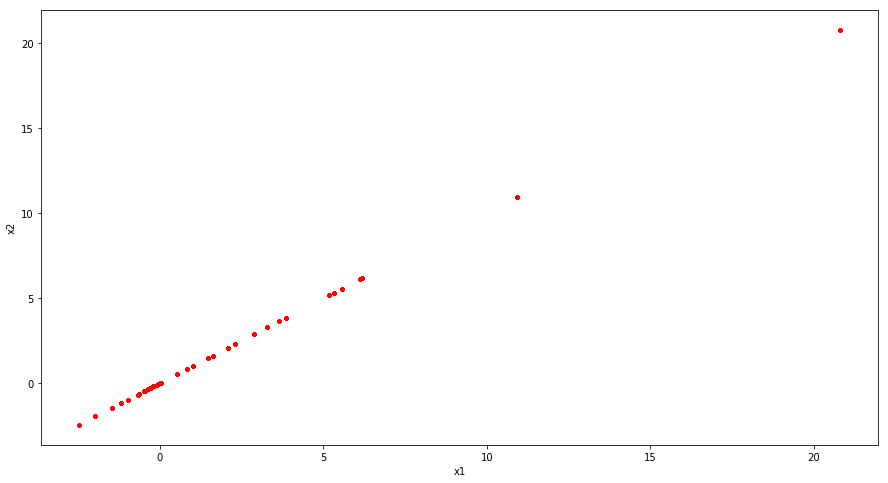

In [198]:
# With the below we see how the clusters are positioned in a scatterplot.
plt.figure(figsize=(15,8))
plt.scatter(cluster_dataframe_converted_scaled[:,:], cluster_dataframe_converted_scaled[:,:], color = 'r', marker = 'o', s = 10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

# 4.b. Plot the distribution of customers by segment: We convert the array to a list

In [199]:
cluster_prediction=y_km.tolist()

In [200]:
# We create column cluster prediction 
cluster_dataframe_converted['cluster_prediction']=True

In [201]:
cluster_dataframe_converted.head(n=3)

,education,age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,cluster_prediction
0,7,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,True
1,6,2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,True
2,7,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,True


Let us append the Cluster classification to our dataset

In [202]:
cluster_dataframe_converted['cluster_prediction']=cluster_prediction

In [203]:
#We now get the frequency by classification
cluster_distribution = cluster_dataframe_converted['cluster_prediction'].value_counts()

In [204]:
cluster_distribution

9     1482
5     1244
11    1206
13     969
7      606
4      547
2      534
10     504
8      311
1      295
12     270
0      232
14     225
3      220
6       20
Name: cluster_prediction, dtype: int64

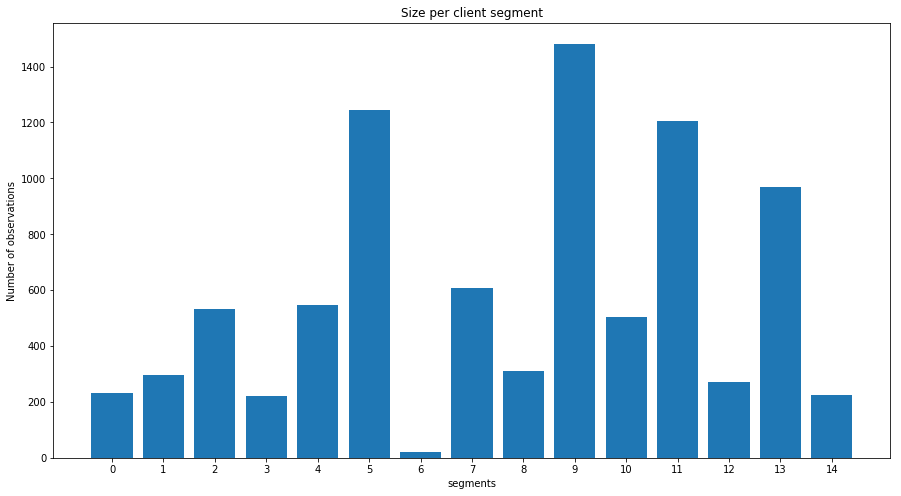

In [205]:
plt.figure(figsize=(15,8))
plt.plot(color = '#eebc36')
plt.bar(x=cluster_distribution.index,height=cluster_distribution, width = 0.8)
plt.title('Size per client segment')
plt.xlabel('segments')
plt.ylabel('Number of observations')
plt.xticks(cluster_distribution.index, cluster_distribution.index)
plt.show()

In [206]:
# Task 3: We now check the silhoutte coeffiecient to evaluate the results of our clusters

In [207]:
def silhouette_plot(cluster_dataframe_converted_scaled, y_km):
    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]
    
    # Call the sklearn.metrics.silhouette_samples to get for each point in X it's silhouette coefficient
    # Notice that the Euclidean distance is being used
    silhouette_coefficients = silhouette_samples(cluster_dataframe_converted_scaled, y_km, metric = 'euclidean')
    
    # use it to store custom tick locations for the y-axis
    y_ticks = []
    
    # use it to set the bounds of each cluster's horizontal bar plot and to
    # calculate custom tick locations for the y-axis
    y_ax_lower, y_ax_upper = 0, 0
    
    # Loop over all cluster's labels and produce the silhouette coefficient plot for each cluster
    for i, c in enumerate(cluster_labels):
        # Get silhouette coefficient of points that are in the cluster c
        cluster_silhouette_coefficients =\
        silhouette_coefficients[y_km == c]
        cluster_silhouette_coefficients.sort()
        
        # Find the upper boundary for the y-axis (how many data points for cluster c)
        y_ax_upper += len(cluster_silhouette_coefficients)
        
        # Get a colour to use only for data points of cluster c
        col = cm.jet(i / n_clusters)
        
        # Create the horizontal bar plot
        plt\
        .barh(range(y_ax_lower, y_ax_upper),\
              cluster_silhouette_coefficients,\
                 height = 1, color = col)
        
        # Store the y-tick value as the midpoint (for aesthetic purposes)
        y_ticks.append((y_ax_lower + y_ax_upper) / 2.0)
        
        # Update the lower bound to be used for the next horizontal bar plot
        y_ax_lower += len(cluster_silhouette_coefficients)
    
    # Calculate and add to the plot the average silhouette coefficient
    silhouette_average = np.mean(silhouette_coefficients)
    plt.axvline(silhouette_average, color = 'r', linestyle = '--')
    
    # Add the calculated y-ticks, along with their labels
    plt.yticks(y_ticks, cluster_labels + 1)
    
    # Set axes labels
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette Coefficient')
    
    # Return the graph
    return plt



In [208]:
cluster_dataframe_converted_scaled

array([[ 1.02976623,  0.        ,  1.62456986, ..., -1.17773186,
         1.49277944, -0.04809861],
       [ 0.53111169,  0.        , -0.61554755, ...,  0.8490897 ,
        -0.66989133, -0.04809861],
       [ 1.02976623,  0.        ,  1.62456986, ...,  0.8490897 ,
        -0.66989133, -0.04809861],
       ..., 
       [ 1.02976623,  0.        ,  1.62456986, ...,  0.8490897 ,
        -0.66989133, -0.04809861],
       [-0.96485194,  0.        , -0.61554755, ...,  0.8490897 ,
        -0.66989133, -0.04809861],
       [ 0.03245715,  0.        , -0.61554755, ...,  0.8490897 ,
        -0.66989133, -0.04809861]])

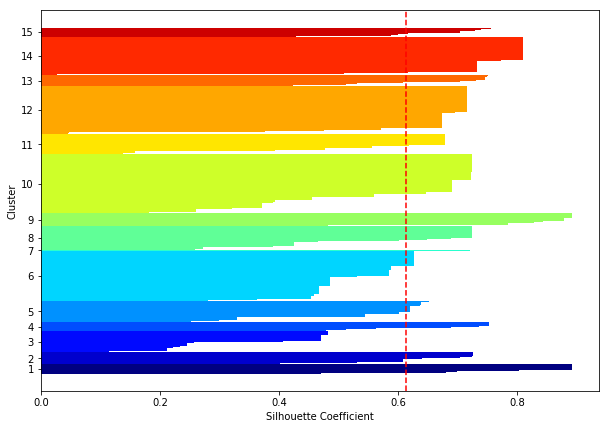

In [216]:
plt.figure(figsize=(10,7))
silhouette_plot(cluster_dataframe_converted_scaled, y_km)
plt.show()

From our observation of the shillouette plot, we can see that 13 out of 15 clusters are above average while only 2 of the clusters are below average and with small sizes.
The Silhouette plot also shows that only 2 of the clusters are small and have most of their datapoints as the boarderline data points. While 12 of the clusters have the bulk of their data points as inliers.   Thus, we can state that these two clusters have most of their data points as boundaries with neighbouring clusters.